In [1]:
import numpy as np
from scipy.integrate import odeint
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
%run System.ipynb

Hybrid system succesfully defined


In [3]:
gamma = 9.81
c = 1

In [4]:
# Define Flow map
def f(xi,t):
    x = xi[0]
    v = xi[1]
    dxdt = v
    dvdt = -1.0*gamma
    return [dxdt,dvdt]

In [5]:
# Define Jump map
def g(xi):
    x = xi[0]
    v = xi[1]
    return [x,-v]

In [6]:
# Define flow set
def C(xi):
    x = xi[0]
    v = xi[1]
    inside = 1
    if x < 0:
        inside = 0
    return inside

In [7]:
# Define jump set
def D(xi):
    x = xi[0]
    v = xi[1]
    jump = 0
    if ((x<=0) and (v<0)):#or ((x>=1.5) and (v>0)):
        jump = 1
    return jump

In [8]:
# Define Simulation parameters
# Time
Tspan = [0.0,20.0]  # simulation time
Jspan = 100   # discrete time span
Intervals = 2000 # nbr of intervals in which devide the time span
res = 10000    # nbr of points in every interval
ts = Tspan[1]/Intervals # sampling time
# Initial Condition
xi0 = [2,0]

In [9]:
i = 1 # count number of iterations
j = 0 # count number of jump

t = [0.0]
xi = np.empty((0,2))
#print(xi.shape)
while i<=Intervals and j<Jspan:
    # integrate the equation in ti
    ti = np.linspace(0,ts,res)
    x = odeint(f,xi0,ti)
    # reset the initial condition
    xi0 = x[-1,:]
    # check for jumps in the interval and, in case, run the jump map
    for k in range(0, res):
        if D(x[k,:]):
            xi0 = g(x[k,:])
            ti = ti[0:k]
            x = x[0:k,:]
            j += 1 
            print('jump detected')
            break
    # save the partial results
    tn = ti+t[-1]*np.ones(ti.shape[0])
    t  = np.append(t,tn)
    xi = np.append(xi,x,axis=0)
    # increment the iteration counter
    i += 1
            

jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected
jump detected


In [10]:
x = xi[:,0]
v = xi[:,1]
t = t[1:]

<IPython.core.display.Javascript object>


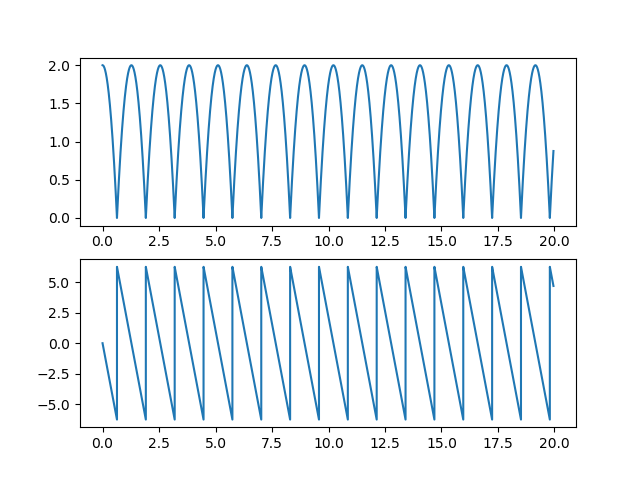

In [11]:
plt.figure(1)
plt.subplot(211)
plt.plot(t,x)
plt.subplot(212)
plt.plot(t,v)

<IPython.core.display.Javascript object>


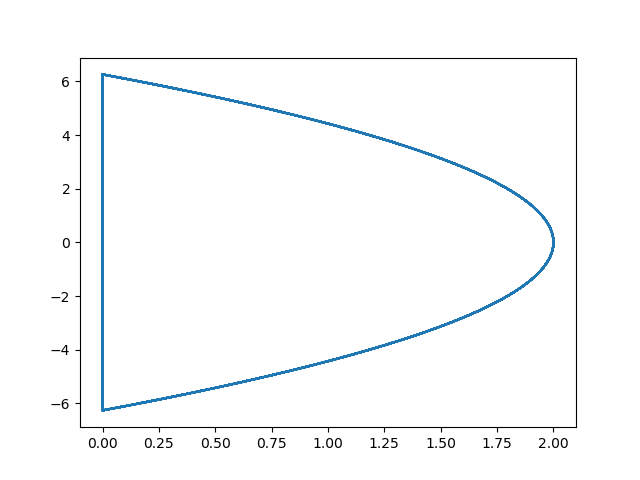

In [12]:
plt.figure(2)
plt.plot(x,v)

In [13]:
# Compute the energy of the system
H = 0.5*np.power(v,2) + gamma*x

<IPython.core.display.Javascript object>


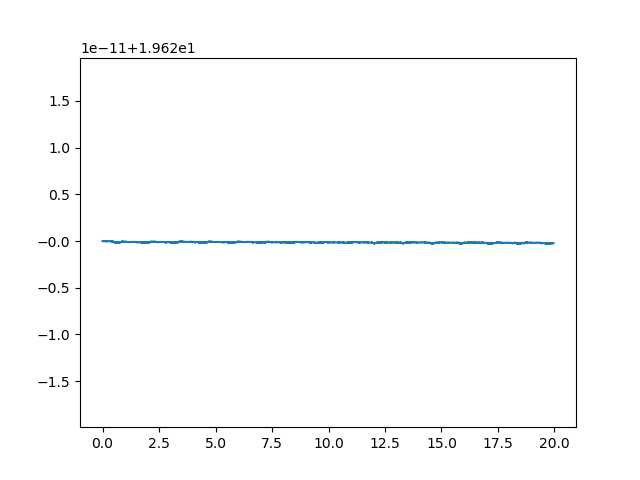

In [14]:
plt.figure(3)
plt.plot(t,H)